<a href="https://colab.research.google.com/github/aman5898/Data-Science-Extended-LRC/blob/main/2021-12-30-Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Get the data

eda, visualize

feature engineering

preprocess

model traing

evaluation, tuning

# Get the Data

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
housing = pd.read_csv("https://raw.githubusercontent.com/mohitgupta-omg/Kaggle-California-Housing-Prices/master/Data/housing.csv")
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
housing['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


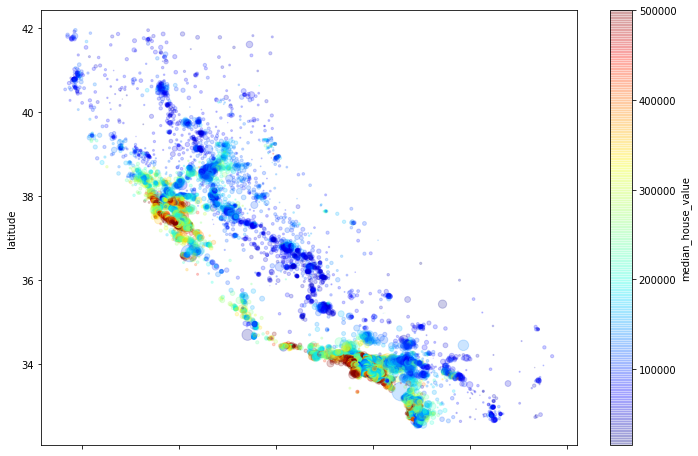

In [ ]:
import matplotlib.pyplot as plt

housing.plot(kind='scatter', x='longitude', y='latitude', s=housing['population']/100, cmap=plt.get_cmap('jet'), alpha=0.2, c='median_house_value', figsize=(12,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffbbb2927d0>,
      dtype=object)

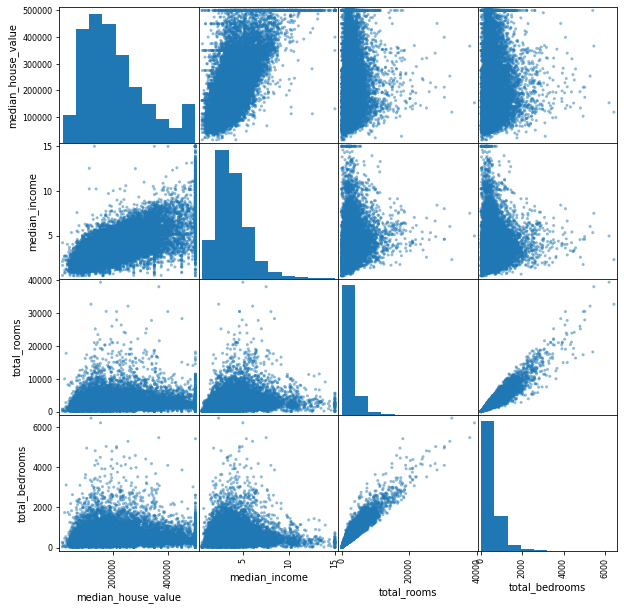

In [ ]:
attributes = ['median_house_value', 'median_income', 'total_rooms',	'total_bedrooms']

pd.plotting.scatter_matrix(housing[attributes], figsize = (10, 10))

In [ ]:
housing.corr()['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

# Feature Enginee

In [ ]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [ ]:
housing['rooms_per_house'] = housing['total_rooms'] / housing['households']

In [ ]:
housing['bedroom_per_rooms_'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_house'] = housing['population'] / housing['households']

In [ ]:
housing.corr()['median_house_value'].sort_values(ascending = False)

median_house_value      1.000000
median_income           0.688075
rooms_per_house         0.151948
total_rooms             0.134153
housing_median_age      0.105623
households              0.065843
total_bedrooms          0.049686
population_per_house   -0.023737
population             -0.024650
longitude              -0.045967
latitude               -0.144160
bedroom_per_rooms_     -0.255880
Name: median_house_value, dtype: float64

# Preparing data for model



*   Data Clean
*   handling text data



In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   longitude             20640 non-null  float64
 1   latitude              20640 non-null  float64
 2   housing_median_age    20640 non-null  float64
 3   total_rooms           20640 non-null  float64
 4   total_bedrooms        20433 non-null  float64
 5   population            20640 non-null  float64
 6   households            20640 non-null  float64
 7   median_income         20640 non-null  float64
 8   median_house_value    20640 non-null  float64
 9   ocean_proximity       20640 non-null  object 
 10  rooms_per_house       20640 non-null  float64
 11  bedroom_per_rooms_    20433 non-null  float64
 12  population_per_house  20640 non-null  float64
dtypes: float64(12), object(1)
memory usage: 2.0+ MB


In [ ]:
housing['total_bedrooms'] = housing['total_bedrooms'].fillna(housing['total_bedrooms'].mean())
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   longitude             20640 non-null  float64
 1   latitude              20640 non-null  float64
 2   housing_median_age    20640 non-null  float64
 3   total_rooms           20640 non-null  float64
 4   total_bedrooms        20640 non-null  float64
 5   population            20640 non-null  float64
 6   households            20640 non-null  float64
 7   median_income         20640 non-null  float64
 8   median_house_value    20640 non-null  float64
 9   ocean_proximity       20640 non-null  object 
 10  rooms_per_house       20640 non-null  float64
 11  bedroom_per_rooms_    20433 non-null  float64
 12  population_per_house  20640 non-null  float64
dtypes: float64(12), object(1)
memory usage: 2.0+ MB


In [ ]:
housing['bedroom_per_rooms_'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_house'] = housing['population'] / housing['households']

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'median')

## categorical data

In [ ]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_house,bedroom_per_rooms_,population_per_house
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467


In [ ]:
housing['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [ ]:
housing.join(pd.get_dummies(housing['ocean_proximity']))

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_house,bedroom_per_rooms_,population_per_house,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,0.224625,2.560606,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,0.215208,3.122807,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,0.215173,2.325635,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,0.219892,2.123209,0,1,0,0,0


## Scaleing

In [ ]:
from sklearn.preprocessing import StandardScaler

housing_num = housing.drop(['ocean_proximity'], axis=1)
scaler = StandardScaler()

scaler.fit(housing_num)
housing_num_scaled = scaler.transform(housing_num)

In [ ]:
housing_num_scaled

array([[-1.32783522,  1.05254828,  0.98214266, ..., -0.01556621,
         2.83074203, -0.38446649],
       [-1.32284391,  1.04318455, -0.60701891, ..., -0.01556621,
         2.83074203, -0.38446649],
       [-1.33282653,  1.03850269,  1.85618152, ..., -0.01556621,
         2.83074203, -0.38446649],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ..., -0.01556621,
        -0.35326426, -0.38446649],
       [-0.87362627,  1.77823747, -0.84539315, ..., -0.01556621,
        -0.35326426, -0.38446649],
       [-0.83369581,  1.75014627, -1.00430931, ..., -0.01556621,
        -0.35326426, -0.38446649]])

In [ ]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_house,bedroom_per_rooms_,population_per_house
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,0.219892,2.123209


In [ ]:
X = housing.drop(['median_house_value'], axis = 1)
y = housing['median_house_value']

In [ ]:
X.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'rooms_per_house', 'bedroom_per_rooms_',
       'population_per_house'],
      dtype='object')

In [ ]:
from sklearn.pipeline import Pipeline

num_columns = list(X.drop('ocean_proximity', axis = 1).columns)
cat_columns = ['ocean_proximity']

num_pipeline =  Pipeline([
          ('imputer', SimpleImputer(strategy = 'median')),
          ('scaling', StandardScaler())
])

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

full_pipeline = ColumnTransformer([
  ('num', num_pipeline, num_columns),
  ('cat', OneHotEncoder(), cat_columns)
])

In [ ]:
x = full_pipeline.fit_transform(X)

# Select and train Model

In [ ]:
from sklearn.linear_model import LinearRegression

lin = LinearRegression()

lin.fit(x, y)

LinearRegression()

In [ ]:
y_pred = lin.predict(x)

In [ ]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

In [ ]:
y_pred

array([406285.01308562, 429930.10841522, 378025.65747255, ...,
        37411.64871708,  48379.88730957,  64246.49229274])

In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y, y_pred)
mse

4676177258.839182

In [ ]:
np.sqrt(mse)

68382.58008322866

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()

tree.fit(x, y)

DecisionTreeRegressor()

In [ ]:
y_pred = tree.predict(x)

In [ ]:
mse = mean_squared_error(y, y_pred)
np.sqrt(mse)

0.0

In [ ]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

In [ ]:
y_pred

array([452600., 358500., 352100., ...,  92300.,  84700.,  89400.])

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y)

In [ ]:
x_train.shape, x_test.shape

In [ ]:
y_train.shape, y_test.shape

In [ ]:
tree = DecisionTreeRegressor()

tree.fit(x_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred = tree.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
np.sqrt(mse)

69500.96392338631

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred = rf.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
np.sqrt(mse)

49790.646104112915

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators': [3, 10, 30], 'max_features':[3, 6]}

gscv = GridSearchCV(rf, params, scoring='neg_mean_squared_error')

gscv.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_features': [3, 6], 'n_estimators': [3, 10, 30]},
             scoring='neg_mean_squared_error')

In [ ]:
gscv.cv_results_

for score, params in zip(gscv.cv_results_['mean_test_score'], gscv.cv_results_['params']):
    print(np.sqrt(-score), params)

61398.72946355068 {'max_features': 3, 'n_estimators': 3}
53957.69030290279 {'max_features': 3, 'n_estimators': 10}
51603.842263798986 {'max_features': 3, 'n_estimators': 30}
58477.48886826665 {'max_features': 6, 'n_estimators': 3}
52643.678373591625 {'max_features': 6, 'n_estimators': 10}
50338.304945166914 {'max_features': 6, 'n_estimators': 30}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

params = {'n_estimators': [30, 50], 'max_features':[6, 10, 12]}

gscv = RandomizedSearchCV(rf, params, scoring='neg_mean_squared_error')

gscv.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


RandomizedSearchCV(estimator=RandomForestRegressor(),
                   param_distributions={'max_features': [6, 10, 12],
                                        'n_estimators': [30, 50]},
                   scoring='neg_mean_squared_error')

In [ ]:
for score, params in zip(gscv.cv_results_['mean_test_score'], gscv.cv_results_['params']):
    print(np.sqrt(-score), params)

50379.21272926825 {'n_estimators': 30, 'max_features': 6}
49676.17384243366 {'n_estimators': 50, 'max_features': 6}
50610.40457611814 {'n_estimators': 30, 'max_features': 10}
50088.84104627545 {'n_estimators': 50, 'max_features': 10}
50760.42029368625 {'n_estimators': 30, 'max_features': 12}
50251.20673293145 {'n_estimators': 50, 'max_features': 12}
